<a href="https://colab.research.google.com/github/ryanravanelly/Project-Bike-Sharing/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Proyek Bike Sharing***

## **Mempersiapkan Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

## **Data Wrangling**

### **Gathering Data**

###### Menambahkan dataset `day_df` dari github

In [2]:
day_df = pd.read_csv('https://raw.githubusercontent.com/ryanravanelly/Project-Bike-Sharing/refs/heads/main/data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


###### Menambahkan dataset `hour_df` dari github

In [3]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/ryanravanelly/Project-Bike-Sharing/refs/heads/main/data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### **Assesing Data**

#### Menilai tabel `day_df`

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### **Cleaning Data**

#### Cleaning data tabel `day_df`

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### Menangani kesalahan tipe data

In [13]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Cleaning data tabel `hour_df`

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Menangani kesalahan tipe data

In [16]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## **Exploratory Data Analysis (EDA)**

##### **Pertanyaan Bisnis**
1. Bagaimana demografi pelanggan yang menggunakan jasa kita?
2. Apakah cuaca mempengaruhi frekuensi penggunaan layanan bike sharing?
3. Waktu apa yang memiliki tingkat penggunaan tertinggi oleh pelanggan layanan bike sharing?


### Explore `day_df`

In [18]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [19]:
day_df.instant.is_unique

True

In [20]:
group_1 = day_df.groupby(['yr','season','weathersit']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()

season_names = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
year_names_1 = {0: '2011', 1: '2012'}
weathersit_names = {1: 'Sunny Cloudy', 2: 'Cloudy Mist', 3: 'Light Rain or Snow'}

renamed_1 = group_1.copy()
renamed_1['season'] = renamed_1['season'].replace(season_names)
renamed_1['yr'] = renamed_1['yr'].replace(year_names_1)
renamed_1['weathersit'] = renamed_1['weathersit'].replace(weathersit_names)

filtered_df = renamed_1[renamed_1['weathersit'].isin(['Sunny Cloudy', 'Cloudy Mist', 'Light Rain or Snow'])]
total_cnt = filtered_df.groupby(['yr', 'weathersit'])['cnt'].sum().reset_index()

#Season
season_2011 = renamed_1[renamed_1['yr'] == '2011']
season_2012 = renamed_1[renamed_1['yr'] == '2012']

#Weathersit
wthr_2011 = total_cnt[total_cnt['yr'] == '2011'].sort_values(by='cnt', ascending=False)
wthr_2012 = total_cnt[total_cnt['yr'] == '2012'].sort_values(by='cnt', ascending=False)

In [21]:
print(season_2011)

      yr  season          weathersit  casual  registered     cnt
0   2011  spring        Sunny Cloudy   16540       82995   99535
1   2011  spring         Cloudy Mist    4805       44531   49336
2   2011  spring  Light Rain or Snow      80        1049    1129
3   2011  summer        Sunny Cloudy   50941      169382  220323
4   2011  summer         Cloudy Mist   26323       98190  124513
5   2011  summer  Light Rain or Snow     300        2180    2480
6   2011    fall        Sunny Cloudy   71488      237662  309150
7   2011    fall         Cloudy Mist   23487       80465  103952
8   2011    fall  Light Rain or Snow     475        6073    6548
9   2011  winter        Sunny Cloudy   38303      167756  206059
10  2011  winter         Cloudy Mist   13372       91751  105123
11  2011  winter  Light Rain or Snow    1138       13817   14955


In [22]:
print(season_2012)

      yr  season          weathersit  casual  registered     cnt
12  2012  spring        Sunny Cloudy   25022      187479  212501
13  2012  spring         Cloudy Mist   13974       92263  106237
14  2012  spring  Light Rain or Snow     201        2409    2610
15  2012  summer        Sunny Cloudy   95447      311216  406663
16  2012  summer         Cloudy Mist   30391      133192  163583
17  2012  summer  Light Rain or Snow     120         907    1027
18  2012    fall        Sunny Cloudy   96457      393836  490293
19  2012    fall         Cloudy Mist   32920      113807  146727
20  2012    fall  Light Rain or Snow    1264        3195    4459
21  2012  winter        Sunny Cloudy   52148      261280  313428
22  2012  winter         Cloudy Mist   24504      172883  197387
23  2012  winter  Light Rain or Snow     317        4344    4661


In [23]:
print(wthr_2011)

     yr          weathersit     cnt
2  2011        Sunny Cloudy  835067
0  2011         Cloudy Mist  382924
1  2011  Light Rain or Snow   25112


In [24]:
print(wthr_2012)

     yr          weathersit      cnt
5  2012        Sunny Cloudy  1422885
3  2012         Cloudy Mist   613934
4  2012  Light Rain or Snow    12757


### Explore `hour_df`

In [25]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [26]:
hour_df.instant.is_unique

True

In [27]:
group_2 = hour_df.groupby(['yr', 'hr']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()

year_names_2 = {
    0: '2011',
    1: '2012'
}

#Menggunakan Teknik Binning
bins = [0, 5, 10, 14, 19, 24]
labels = ['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night']

renamed_2 = group_2.copy()
renamed_2['yr'] = renamed_2['yr'].replace(year_names_2)
renamed_2['time_of_day'] = pd.cut(
    renamed_2['hr'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)
total_time = renamed_2.groupby(['yr', 'time_of_day'])['cnt'].sum().reset_index()

#Jam Penggunaan Layanan
time_2011 = total_time[total_time['yr'] == '2011'].sort_values(by='cnt', ascending=False)
time_2012 = total_time[total_time['yr'] == '2012'].sort_values(by='cnt', ascending=False)

<ipython-input-27-2d470f86d661>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_time = renamed_2.groupby(['yr', 'time_of_day'])['cnt'].sum().reset_index()


In [28]:
print(time_2011)

     yr time_of_day     cnt
3  2011     Evening  465311
4  2011       Night  260288
2  2011   Afternoon  242646
1  2011     Morning  237841
0  2011  Late Night   37017


In [29]:
print(time_2012)

     yr time_of_day     cnt
8  2012     Evening  767870
9  2012       Night  416049
6  2012     Morning  406162
7  2012   Afternoon  404264
5  2012  Late Night   55231


## **Visualization & Explanatory Analysis**

#### Menggabungkan Data

In [30]:
season_2011 = season_2011.copy()
season_2012 = season_2012.copy()
wthr_2011 = wthr_2011.copy()
wthr_2012 = wthr_2012.copy()
time_2011 = time_2011.copy()
time_2012 = time_2012.copy()

season_2011.loc[:, 'type'] = 'season'
season_2012.loc[:, 'type'] = 'season'
wthr_2011.loc[:, 'type'] = 'weather'
wthr_2012.loc[:, 'type'] = 'weather'
time_2011.loc[:, 'type'] = 'time'
time_2012.loc[:, 'type'] = 'time'

season_2011.loc[:, 'year'] = '2011'
season_2012.loc[:, 'year'] = '2012'
wthr_2011.loc[:, 'year'] = '2011'
wthr_2012.loc[:, 'year'] = '2012'
time_2011.loc[:, 'year'] = '2011'
time_2012.loc[:, 'year'] = '2012'

season_2011 = season_2011.rename(columns={'season': 'category'})
season_2012 = season_2012.rename(columns={'season': 'category'})

wthr_2011 = wthr_2011.rename(columns={'weathersit': 'category'})
wthr_2012 = wthr_2012.rename(columns={'weathersit': 'category'})

time_2011 = time_2011.rename(columns={'time_of_day': 'category'})
time_2012 = time_2012.rename(columns={'time_of_day': 'category'})

all_df = pd.concat([
    season_2011,
    season_2012,
    wthr_2011,
    wthr_2012,
    time_2011,
    time_2012],
    ignore_index=True
)

print(all_df.head())

     yr category          weathersit   casual  registered     cnt    type  \
0  2011   spring        Sunny Cloudy  16540.0     82995.0   99535  season   
1  2011   spring         Cloudy Mist   4805.0     44531.0   49336  season   
2  2011   spring  Light Rain or Snow     80.0      1049.0    1129  season   
3  2011   summer        Sunny Cloudy  50941.0    169382.0  220323  season   
4  2011   summer         Cloudy Mist  26323.0     98190.0  124513  season   

   year  
0  2011  
1  2011  
2  2011  
3  2011  
4  2011  


#### Bagaimana demografi pelanggan yang menggunakan jasa kita?

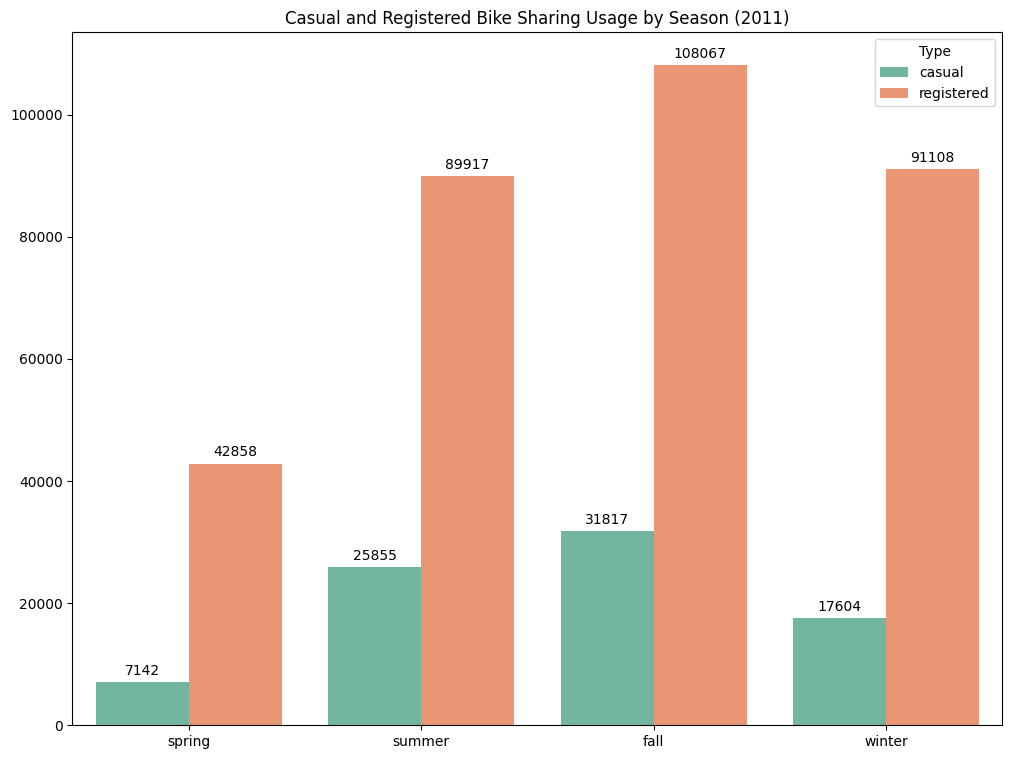

In [31]:
season_2011_data = all_df[(all_df['type'] == 'season') & (all_df['year'] == '2011')]

melted_data = season_2011_data.melt(
    id_vars=['category'],
    value_vars=['casual', 'registered']
)

fig, ax = plt.subplots(figsize=(12, 9))
sns.barplot(
    data=melted_data,
    x='category',
    y='value',
    hue='variable',
    palette='Set2',
    ax=ax,
    errorbar=None
)

for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.0f',
        label_type='edge',
        padding=3
    )

plt.title('Casual and Registered Bike Sharing Usage by Season (2011)')
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title='Type')
plt.show()

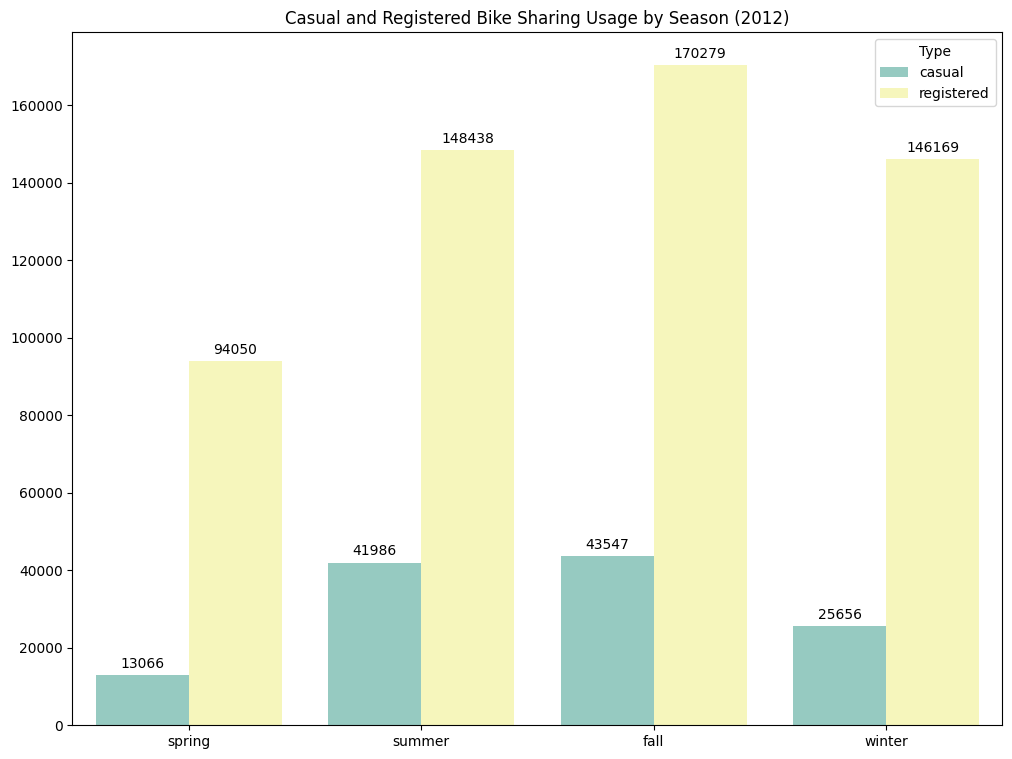

In [32]:
season_2012_data = all_df[(all_df['type'] == 'season') & (all_df['year'] == '2012')]

melted_data = season_2012_data.melt(
    id_vars=['category'],
    value_vars=['casual', 'registered']
)

fig, ax = plt.subplots(figsize=(12, 9))
sns.barplot(
    data=melted_data,
    x='category',
    y='value',
    hue='variable',
    palette='Set3',
    ax=ax,
    errorbar=None
)

for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.0f',
        label_type='edge',
        padding=3
    )

plt.title('Casual and Registered Bike Sharing Usage by Season (2012)')
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title='Type')
plt.show()


<ipython-input-33-f16b6c756bcd>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


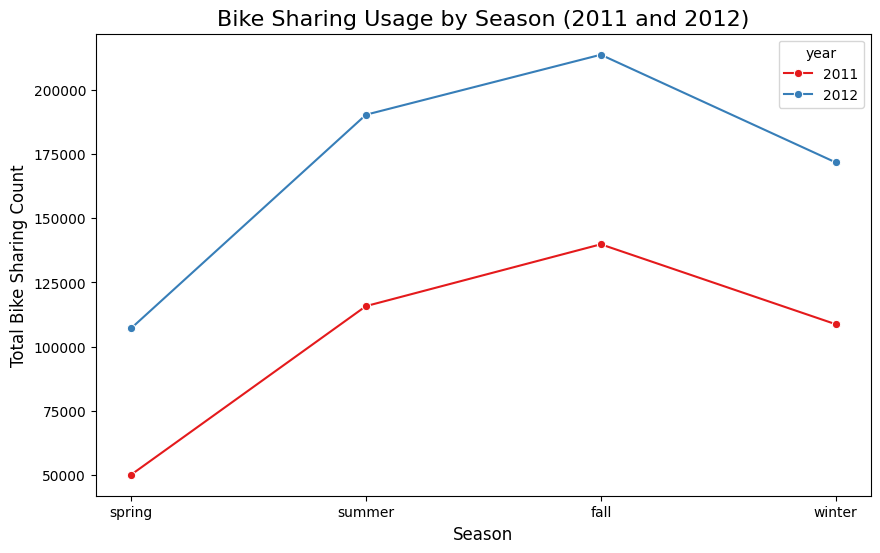

In [33]:
season_data = all_df[(all_df['type'] == 'season') & (all_df['year'].isin(['2011', '2012']))]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=season_data,
    x='category',
    y='cnt',
    hue='year',
    marker='o',
    palette='Set1',
    ci=None
)

plt.title('Bike Sharing Usage by Season (2011 and 2012)', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Bike Sharing Count', fontsize=12)
plt.show()


##### **Rangkuman**

Setelah dilakukan analisis data untuk mendapatkan demografi pelanggan *bike sharing* pada tahun 2011 dan 2012 berdasarkan musim *(season)*, didapatkan hasil bahwa demografi tertinggi berada pada saat musim gugur *(fall)* dan pada tahun 2012 terdapat peningkatan penggunaan yang cukup signifikan dilihat dari tabel perbandingan antara tahun 2011 dan 2012.


#### Apakah cuaca mempengaruhi frekuensi penggunaan layanan bike sharing?

<ipython-input-34-6dab4a3b8dd3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


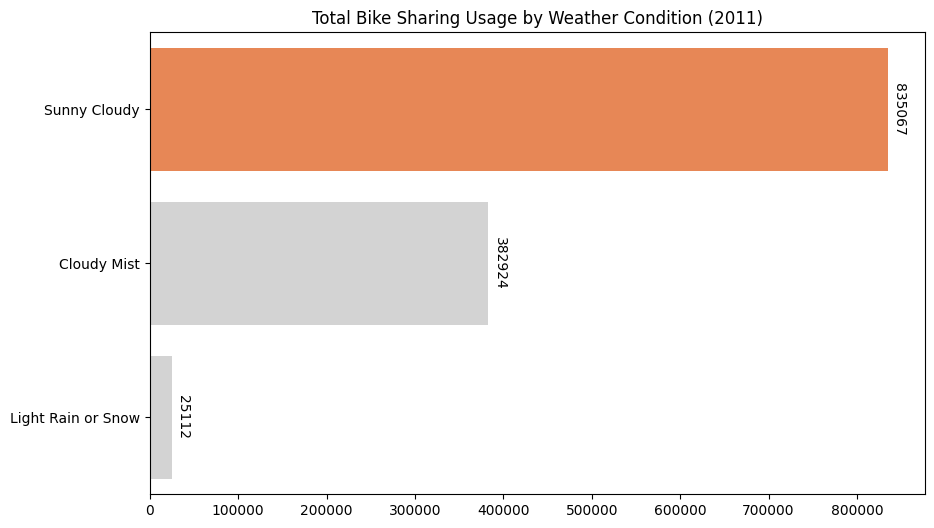

In [34]:
wthr_2011_data = all_df[(all_df['type'] == 'weather') & (all_df['year'] == '2011')]

colors = ["#FF7F3E", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=wthr_2011_data,
    x='cnt',
    y='category',
    palette=colors
)

for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.0f',
        label_type='edge',
        padding=3,
        rotation=270
    )

plt.title('Total Bike Sharing Usage by Weather Condition (2011)')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

<ipython-input-35-1d3603b28dba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


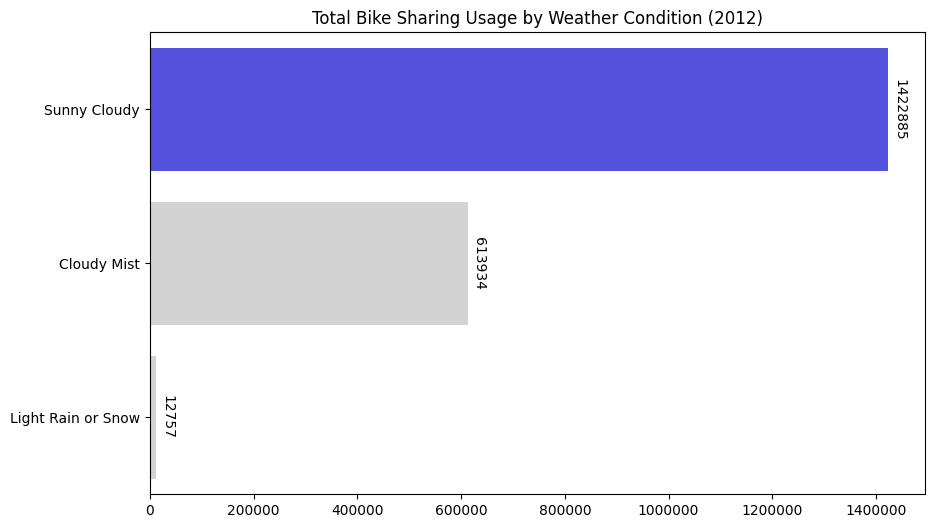

In [35]:
wthr_2012_data = all_df[(all_df['type'] == 'weather') & (all_df['year'] == '2012')]

colors = ["#3D3BF3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=wthr_2012_data,
    x='cnt',
    y='category',
    palette=colors
)

for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.0f',
        label_type='edge',
        padding=3,
        rotation=270
    )
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):}'))

plt.title('Total Bike Sharing Usage by Weather Condition (2012)')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

##### **Rangkuman**

Setelah dilakukan analisis data untuk mendapatkan jumlah penggunaan *bike sharing* pada tahun 2011 dan 2012 berdasarkan kondisi cuaca *(weather)*, terlihat bahwa pada tahun 2011 dan 2012 memiliki kesamaan penggunaan tertinggi saat cuaca cerah berawan *(sunny cloudy)* hal ini kemungkinan besar disebabkan karena pada saat tersebut merupakan cuaca yang baik untuk menggunakan layanan tanpa perlu khawatir oleh hujan.

#### Waktu apa yang memiliki tingkat penggunaan tertinggi oleh pelanggan layanan bike sharing?

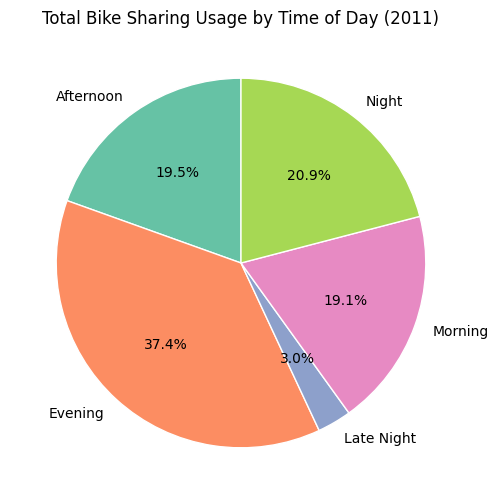

In [36]:
time_2011_data = all_df[(all_df['type'] == 'time') & (all_df['year'] == '2011')]

time_2011_totals = time_2011_data.groupby('category')['cnt'].sum()

plt.figure(figsize=(10, 6))
plt.pie(
    time_2011_totals,
    labels=time_2011_totals.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('Set2', len(time_2011_totals)),
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Total Bike Sharing Usage by Time of Day (2011)')
plt.show()

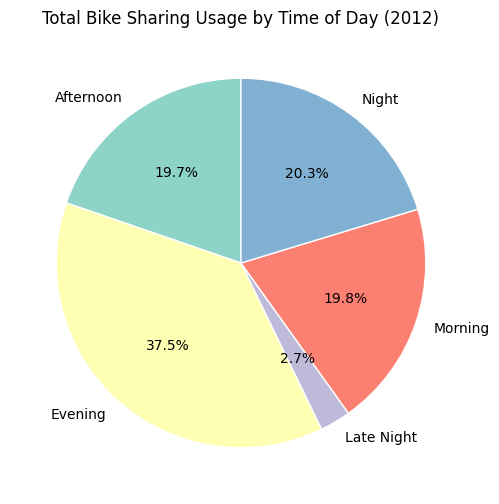

In [37]:
time_2012_data = all_df[(all_df['type'] == 'time') & (all_df['year'] == '2012')]

time_2012_totals = time_2012_data.groupby('category')['cnt'].sum()

plt.figure(figsize=(10, 6))
plt.pie(
    time_2012_totals,
    labels=time_2012_totals.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('Set3', len(time_2012_totals)),
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Total Bike Sharing Usage by Time of Day (2012)')
plt.show()

##### **Rangkuman**

Setelah dilakukan analisis data untuk mendapatkan demografi pelanggan *bike sharing* pada tahun 2011 dan 2012 berdasarkan waktu *(time)*, didapatkan hasil bahwa pada waktu sore hari *(evening)* memiliki persentase yang paling besar yakni lebih dari 30%, hal ini kemungkinan disebabkan karena pada waktu sore hari merupakan waktu yang tepat untuk berkeliling setelah selesai bekerja pada waktu pagi hingga siang hari.

#### Menyimpan Berkas Data yang Sudah Bersih

In [38]:
all_df.to_csv("main_data.csv", index=False)

In [39]:
from google.colab import files

files.download('main_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Conclusion & Sugesstions**

### **Pertanyaan Bisnis**
1. Bagaimana demografi pelanggan yang menggunakan jasa kita?
2. Apakah cuaca mempengaruhi frekuensi penggunaan layanan bike sharing?
3. Waktu apa yang memiliki tingkat penggunaan tertinggi oleh pelanggan layanan bike sharing?

### **Hasil Analisis Data**

---
1. Setelah dilakukan analisis data secara mendalam untuk mendapatkan demografi pelanggan *bike sharing* berdasarkan musim *(season)*, didapatkan pada tahun 2011 hasil tertinggi penggunaan terjadi pada saat musim gugur *(fall)* sebesar 108.067 pelanggan terdaftar sebagai anggota *(registered)* dan 31.817 pelanggan tidak terdaftar anggota *(casual)*. Kemudian, hasil terendah terjadi pada saat musim semi *(spring)* yakni sebesar 42.858 pelanggan terdaftar sebagai anggota *(registered)* dan 7.142 pelanggan tidak terdaftar anggota *(casual)*.

  Sementara itu, pada tahun 2012 angka yang cukup signifikan terjadi pada tingkat penggunaan layanan tertinggi dan terendah, pada penggunaan layanan tertinggi memiliki kesamaan dengan tahun 2011 yakni pada musim gugur *(fall)* dengan pengguna terdaftar sebagai anggota *(registered)* sebesar 170.279 dan pengguna tidak terdaftar anggota *(casual)* sebesar 43.547. lalu, untuk penggunaan layanan terendah pada saat musim semi *(spring)* dengan pengguna terdaftar sebagai anggota *(registered)* sebesar 94.050 dan pengguna tidak terdaftar anggota *(casual)* sebesar 13.066.

  Maka dapat disimpulkan pada hasil demografi pelanggan mulai tahun 2011 hingga tahun 2012 peningkatan tertinggi terjadi pada musim gugur sebesar 62.212 pelanggan terdaftar dan 11.730 pelanggan tidak terdaftar. Hal ini kemungkinan disebabkan karena masyarakat sudah mulai mengenal layanan kami dan pada saat musim gugur merupakan waktu terbaik untuk menggunakan layanan karena memiliki suhu lingkungan yang baik sebelum masuk pada musim dingin. Setelah itu, terjadi pula peningkatan pada penggunaan layanan terendah di musim semi sebesar 51.192 pelanggan terdaftar dan 5.942 pelanggan tidak terdaftar. Penggunaan layanan terendah terjadi di musim semi kemungkinan terjadi karena suhu yang masih cenderung ekstrim untuk bisa menggunakan layanan dengan optimal.  

---

2. Pada analisis data yang dilakukan berdasarkan cuaca *(weathersit)* untuk melihat frekuensi penggunaan layanan bike sharing, Pada tahun 2011 pengguna layanan tertinggi terjadi pada saat cuaca cerah *(sunny cloudy)* dengan total sebesar 835.067 pelanggan. Kemudian, pada penggunaan layanan terendah terjadi pada saat cuaca hujan lebat atau salju *(light rain or snow)* dengan total sebesar 25.112 pelanggan.

   Tahun 2012 memiliki penggunaan layanan tertinggi yang sama pada saat cuaca cerah *(sunny cloudy)* sebesar 1.422.885 pelanggan. Lalu, penggunaan terendah juga terjadi pada saat cuaca hujan lebat atau salju *(light rain or snow)* sebesar 12.757 pelanggan.

   Maka dapat disimpulkan bahwa cuaca memiliki pengaruh pada penggunaan layanan yang dilihat dari hasil analisis yang dilakukan pada tahun 2011 hingga 2012, yakni cuaca cerah masih menjadi pilihan favorit penggunaan layanan karena merupakan waktu yang tepat untuk bisa menggunakan layanan, sementara itu pada cuaca hujan lebat atau salju merupakan pilihan layanan dengan paling sedikit pengguna karena kemungkinan pengguna lebih memilih di rumah untuk bisa bersantai.

---

3. Hasil Analisis berikutnya yang dilakukan berdasarkan jam *(time)* penggunaan layanan pada tahun 2011 memiliki hasil persentase tertinggi pada sore hari *(evening)* yakni sebesar 37.4% dibandingkan waktu lain. Lalu, pada tahun 2012 memiliki kesamaan penggunaan layanan tertinggi pada saat sore hari *(evening)* yakni sebesar 37.5%.

   Dari hasil diatas maka dapat disimpulkan bahwa pada sore hari merupakan waktu dengan tingkat layanan tertinggi, hal ini kemungkinan dipengaruhi karena pada waktu sore hari merupakan waktu yang paling banyak digunakan untuk bersantai setelah bekerja atau bersekolah saat pagi hingga siang hari.




### **Saran Pengembangan**

Dari ketiga pertanyaan bisnis diatas yang telah dijawab berdasarkan analisis data penggunaan layanan terlihat bahwa terjadi peningkatan mulai tahun 2011 hingga 2012, hal ini terjadi karena layanan telah mulai dikenal oleh masyarakat. Untuk kedepannya agar terjadi peningkatan penggunaan kembali dapat menggunakan promosi menggunakan media sosial dan juga tentunya peningkatan layanan seperti kondisi unit sepeda yang dilakukan perawatan secara berkala. Diharapkan dengan menggunakan cara tersebut layanan penggunaan sepeda dapat dikenal lebih luas oleh seluruh kalangan masyarakat.